# DIC-TA,DIC - (TA-DIC) 

In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import utils as ut
import lom


%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

    region

Text(0.5, 0.98, 'colours assigned')

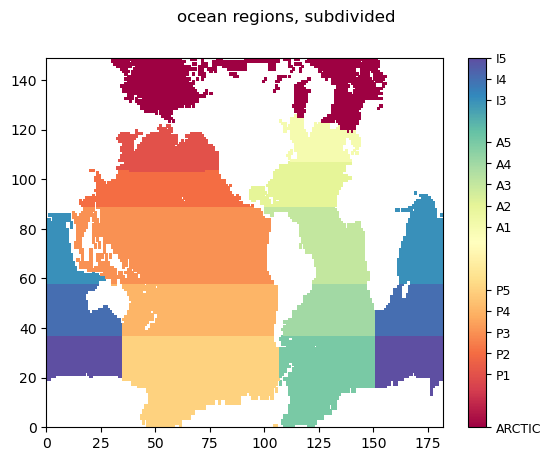

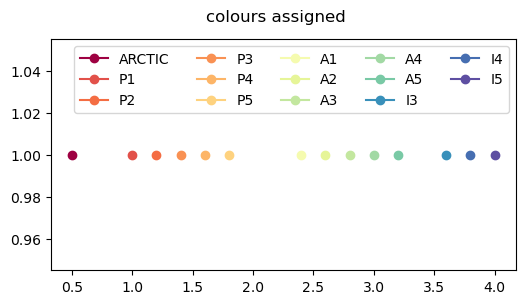

In [32]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

    (make_yearlist) read model data(1)

In [ ]:
# import glob

# def make_yearlist(yrst, yrend, dtype, tr, baseDir):
#     yrs = np.arange(yrst,yrend+1,1)
#     ylist = []
#     for i in range(0,len(yrs)):
#         ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
#         t2 = glob.glob(ty)
#         #print(t2)
#         ylist.append(t2[0])
#     return ylist

# baseDir = '/gpfs/data/greenocean/software/runs/'
# tr = 'TOM12_TJ_GEA0'
# yrst = 1990
# yrend = 2020
# dtype = 'ptrc'
# tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
# tdat_GEA0 = xr.open_mfdataset(tylist)


# tr = 'TOM12_DW_GA01'
# yrst = 1990
# yrend = 2020
# dtype = 'ptrc'
# tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
# tdat_GA01 = xr.open_mfdataset(tylist)


# tr = 'TOM12_DW_WE43'
# yrst = 1990
# yrend = 2020
# dtype = 'ptrc'
# tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
# tdat_WE43 = xr.open_mfdataset(tylist)

    mesh_mask

In [3]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')


In [45]:

tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] # area of grid cells

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

    region

In [48]:
regs_g = regs.copy()
regs_g.append('GLOBAL')
print(regs_g)

['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5', 'GLOBAL']


In [ ]:
extracthorse = True
if extracthorse:
    yst = 2015; yen = 2020; 
    modlist = ['TOM12_TJ_GEA0']     # 'TOM12_DW_GA01','TOM12_DW_WE43']


    for modnam in modlist:
        dtype = 'ptrc_T'; #modnam = modlist[r]
        fnam = f'./EXTRACTED/MLD/MLD_{modnam}_{yst}_{yen}.nc'
        print(fnam)

        ylist = ut.make_yearlist(yst, yen, dtype, modnam)
        tdat = xr.open_mfdataset(ylist)

        DIC_ts = tdat.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
        TA_ts = tdat.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

        tDIC = np.zeros([34,30])
        DIC_ts = tdat.DIC.isel(deptht=0).values
        for r in range(0,len(regs)):
            csize_copy = np.copy(csize_broad)
            csize_copy[maskno_broad != regdict[regs[r]]['number']] = 0
            for i in range(0,30):
                tDIC[r,i] = np.ma.average(DIC_ts[i,:,:], weights = csize_copy[0,:,:])
        
        
        ### get the global one
        
        data_vars = {'DIC':(['region', 'DIC'], tDIC,
                                 {'units': 'model'}),
                    # 'mldr10_1':(['region', 'month'], mldr10_1,
                    #              {'units': 'm'}),             
                    }

        coords = {'region': (['region'], regs_g),\
                 'tDIC': (['DIC'], np.arange(1,30,1))}

        # define global attributes
        attrs = {'made in':'AnalysisRobot/Tester_multimodel_MLD.ipynb',
                }

        # create dataset
        ds = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)
        ds.to_netcdf(fnam)

: 

TRY 1

In [96]:
modnam = 'TOM12_DW_GA01'
depth_index = 0  # 表示要选择的深度索引

yst = 2015
yen = 2020 
dtype = 'grid_T'
fnam = f'./EXTRACTED/MLD/MLD_{modnam}_{yst}_{yen}.nc'
print(fnam)

ylist = ut.make_yearlist(yst, yen, dtype, modnam)
tdat = xr.open_mfdataset(ylist)



./EXTRACTED/MLD/MLD_TOM12_DW_GA01_2015_2020.nc


In [98]:
tdat



<xarray.Dataset>
Dimensions:               (y: 149, x: 182, deptht: 31, time_counter: 72,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2015-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/20)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    tohfls                (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    sosflxdo              (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    taum                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    sowindsp              (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    soprecip              (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    sbt                   (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_20150101_20151231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Jun-08 12:59:37 BST

In [ ]:




# 筛选深度为表层的DIC数据
dic_surface = tdat.DIC.isel(deptht=depth_index)
alk_surface = tdat.Alkalini.isel(deptht=depth_index)


In [ ]:

# 进行加权平均值的特殊计算
dic_weighted_mean = dic_surface.weighted(tmesh['csize']).mean(dim=['x', 'y'])
alk_weighted_mean = alk_surface.weighted(tmesh['csize']).mean(dim=['x', 'y'])

# 创建数据集并保存为NetCDF文件
data_vars = {'DIC_surface': dic_weighted_mean, 'TA_surface': alk_weighted_mean}
coords = {'region': (['region'], regs)}  # 假设有一个名为'region'的坐标
attrs = {'made in': 'AnalysisRobot/Tester_multimodel_MLD.ipynb'}

ds = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)
ds.to_netcdf(fnam)

: 

In [ ]:
dic_surface

: 

: 

In [ ]:
scal = 1
plt.figure(figsize=(5*scal, 5*scal))

for 
    plt.plot(ds['DIC_surface']*1e6, ds['TA_surface']*1e6, '.' , label = 'TOM12_DW_GA01',color='')


plt.xlabel('DIC, umol/L')
plt.ylabel('TA, umol/L')
plt.legend()
plt.title('2015-2020 Surface TA vs. DIC, umol/L')

: 

    load data from EXTRACTED/MLD

In [ ]:
print(tdat.head(5))

: 

In [ ]:
DIC_ts_GEA0 = tdat_GEA0.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
TA_ts_GEA0 = tdat_GEA0.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

: 

    weighted mean DIC

In [ ]:
# ## weighted mean DIC


# DIC_ts_GA01 = tdat_GA01.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
# TA_ts_GA01 = tdat_GA01.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

# DIC_ts_WE43 = tdat_WE43.DIC.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y']) #surface DIC
# TA_ts_WE43 = tdat_WE43.Alkalini.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

: 

    try plot

In [ ]:
# # TA vs. DIC

# plt.plot(DIC_ts_GEA0*1e6, TA_ts_GEA0*1e6, label = 'TOM12_DW_WE43')
# plt.legend()
# plt.title('1990-2020 Surface TA vs. DIC umol/L')

: 

: 